# **[AIO 2022] - Basic RNN/LSTM**
**Họ và tên: Võ Phan Anh Quân**

# **Phần I: Lý thuyết**

## **Recurrent Neural Network**

**Recurrent Neural Network (RNN)** là một trong các loại mạng nơ-ron thường được dùng để giải quyết các bài toán có dữ liệu dạng sequence (dạng chuỗi thời gian) như time series, text... Với cơ chế sử dụng output của thời điểm t − 1 để dự đoán cho input của thời điểm t hiện tại, RNN duyệt qua từng thời điểm t trong mẫu dữ liệu, thực hiện tính toán theo cơ chế trên dẫn đến khả năng ghi nhớ được các thông tin trước đó.
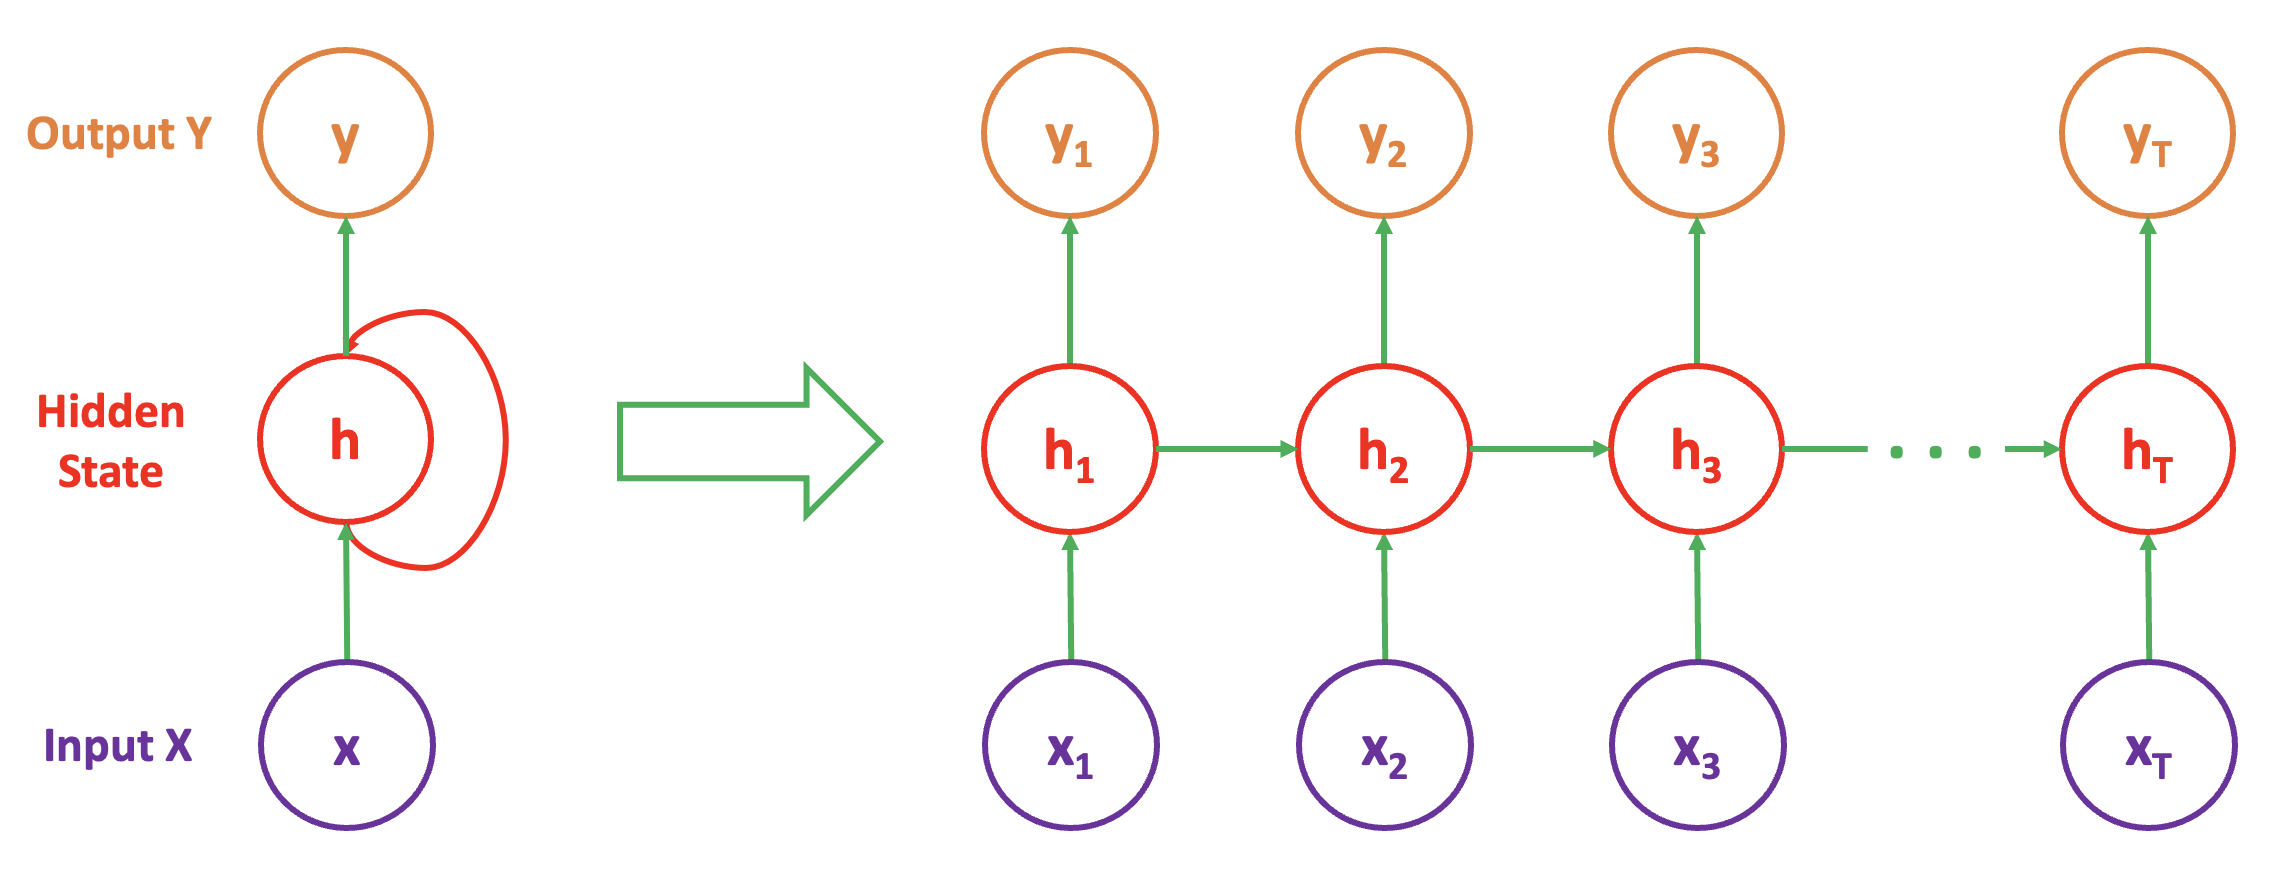

Các thành phần chính của một mạng RNN bao gồm:
* **Node input:** Nhận vào token thứ t của dữ liệu X đầu vào.
* **Node hidden state:** Nơi "lưu trữ" các thông tin ghi nhận được qua từng thời điểm t trong chuỗi dữ liệu đầu vào. Chi tiết các bước tính toán bên trong hidden state được miêu tả rõ hơn ở hình 1.
* **Node output:** Trả về output của mạng RNN tại thời điểm thứ t.

Như vậy, thông qua việc duyệt qua mỗi thời điểm thứ t trong chuỗi dữ liệu, các node nêu trên sẽ được cập nhật giá trị mới (unrolled) liên tục cho đến khi đến điểm kết thúc của chuỗi.

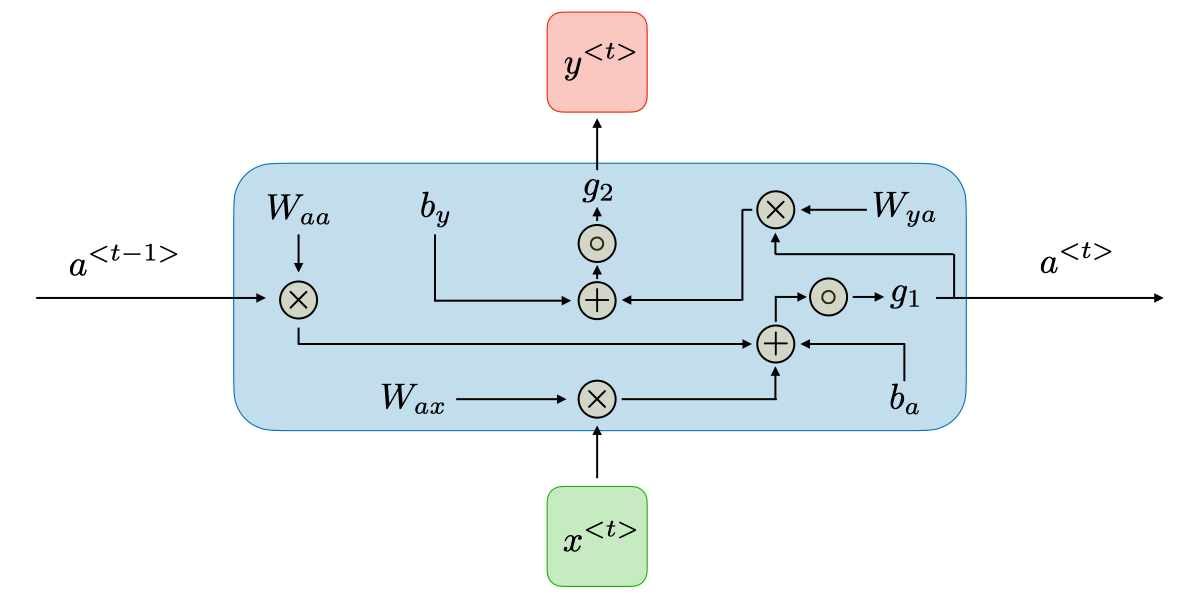

Lưu ý rằng, các trọng số $W_{aa}$, $W_{ax}$ và $W_{ya}$ sẽ được sử dụng chung (tức sẽ được cập nhật giá trị) xuyên suốt trong quá trình tính toán từ thời điểm $t = 0$ đến $t = T$.

## **Long Short Term Memory**

**Long Short-Term Memory (LSTM)** là một mô hình mạng nơ-ron thuộc họ RNN, đây là một phiên bản cải tiến so với kiến trúc RNN truyền thống bằng việc khắc phục phần nào tình trạng vanishing gradient xảy ra khi phải xử lý các dữ liệu có chuỗi dài. Về cơ bản, sự thay đổi lớn nhất của LSTM so với RNN đến từ các bước tính toán bên trong một hidden state như hình dưới đây:

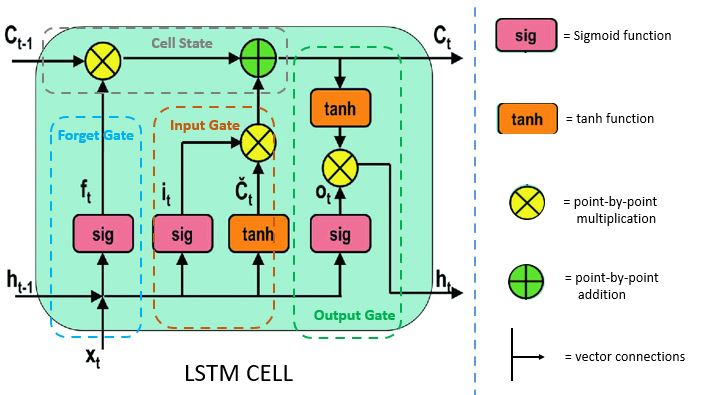

LSTM sử dụng cơ chế cổng (gate) để điều phối lưu lượng thông tin xuyên suốt các thời điểm t trong chuỗi dữ liệu.
* **Forget gate:** Cổng này có nhiệm vụ quyết định nên giữ lại hay bỏ đi một số những thông tin tiếp nhận được từ hidden state của thời điểm t − 1 trước đó.
* **Input gate:** Cổng này dùng để cập nhật thông tin nhận được tại input thứ t hiện tại kết hợp với thông tin nhận được từ hidden state thứ t − 1.
* **Output gate:** Cổng này dùng để quyết định thông tin về hidden state đầu vào cho việc tính toán thứ t + 1, đồng thời còn sử dụng để tính output của **LSTM** tại thời điểm t. Output gate được tính thông qua việc sử dụng hidden state t − 1, input $x^t$ và **cell states**.

# **Phần II: Hourly Temperature Forecasting**

Trong bài tập này, chúng ta sẽ xây dựng một mô hình về Times Series dùng để dự đoán nhiệt độ trong 1 giờ tiếp theo dựa trên nhiệt độ của 6 giờ trước đó. Các bạn sẽ thực hiện theo hướng dẫn sau:

## **1. Tải bộ dữ liệu:**

Các bạn tải bộ dữ liệu tại [đây](https://drive.google.com/file/d/1F6kUoxIeDbc_oQO2ADtyIetzQkRdIc0r/view). Dưới đây là thông tin 4 hàng đầu tiên của bảng dữ liệu:

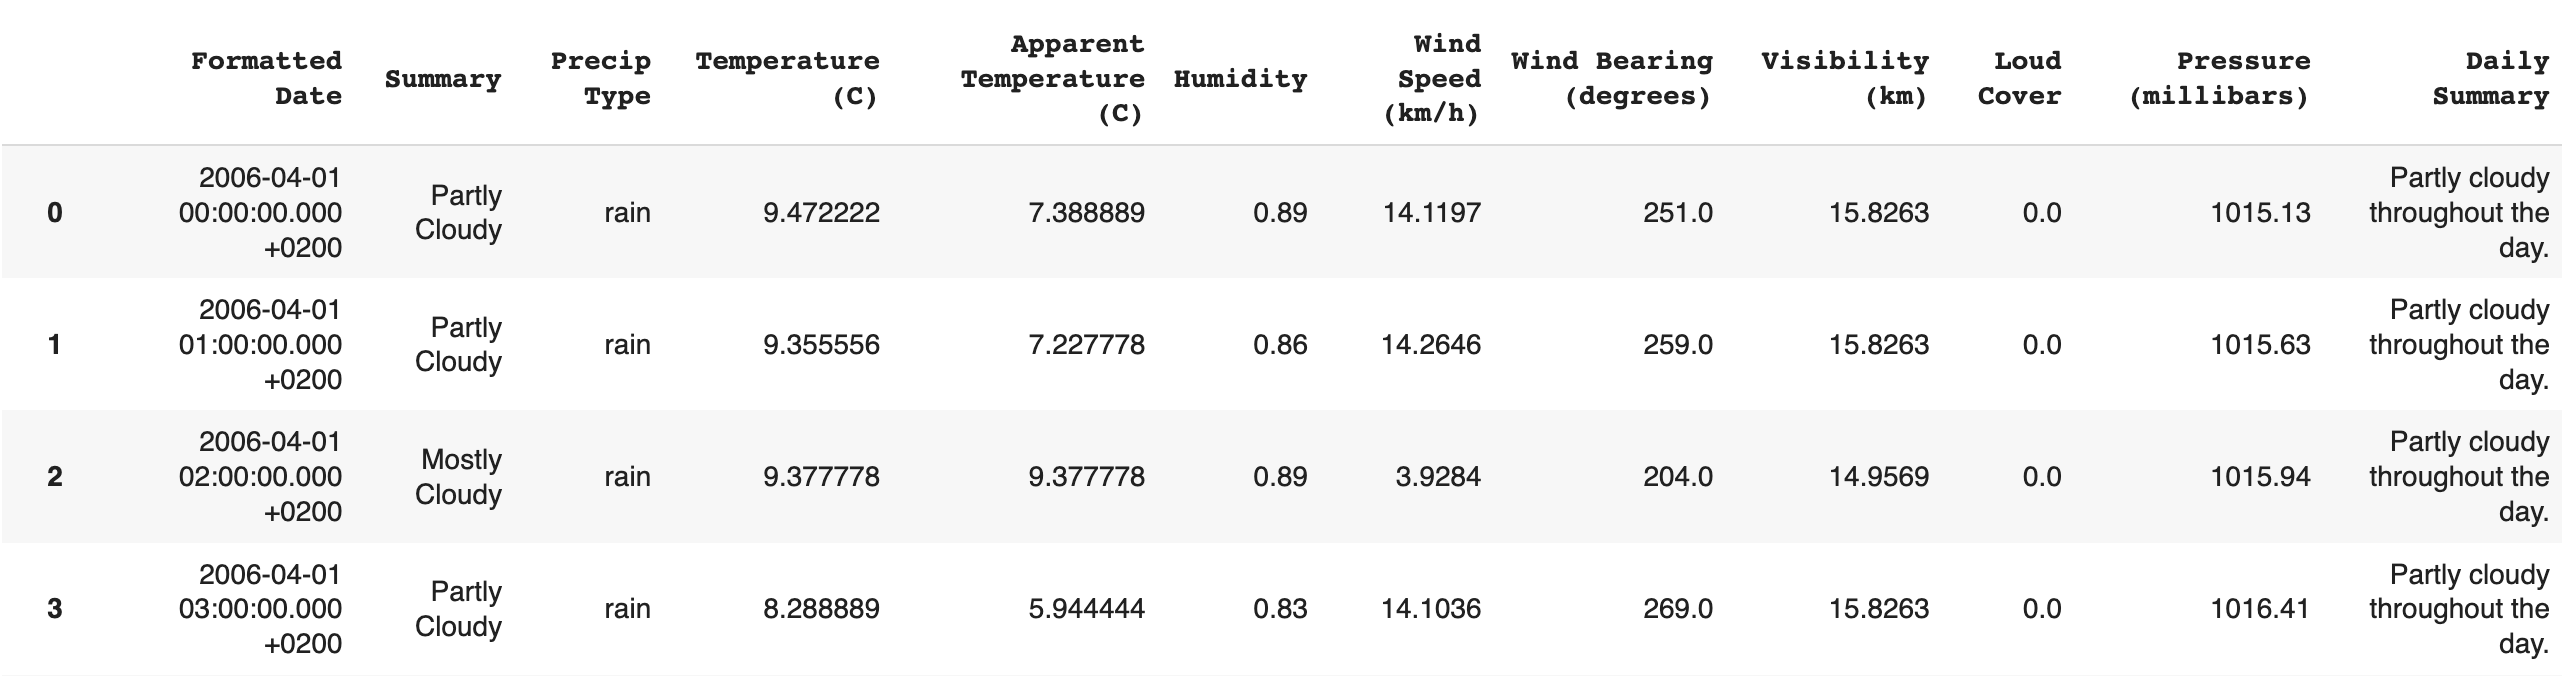

## **2. Chuẩn bị dữ liệu**

### **(a) Đọc dữ liệu từ file .csv:**

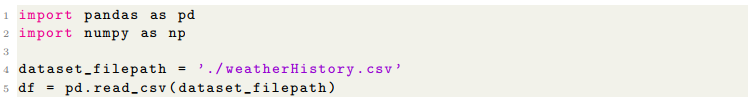

Trong bài tập lần này, vì mô hình chỉ dự đoán nhiệt độ (Temperature (C)) nên ta sẽ loại bỏ đi các cột không cần thiết trong DataFrame trước khi đưa vào tiền xử lý:

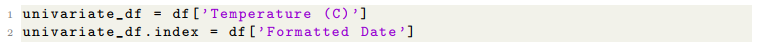

Như vậy, dữ liệu bảng của chúng ta sẽ có dạng:

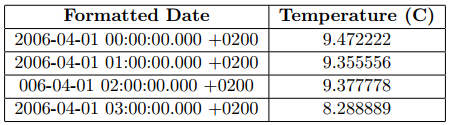

### **(b) Xây dựng hàm tạo cặp X, y:**

Cũng như bất kì các bài toán thuộc nhánh học có giám sát trên dữ liệu dạng bảng khác, ta cần xác định X, y của bài toán sao cho phù hợp. Thông thường, X sẽ là các đặc trưng và y sẽ là nhãn tương ứng cho các đặc trưng X (thường được định nghĩa rõ ràng trong bảng dữ liệu). Tuy nhiên ở bài toán này, ta không có các nhãn cụ thể theo như đề bài đưa ra. Chính vì vậy, cần phải thực hiện chỉnh sửa Input/Output của dữ liệu sao cho phù hợp để ta có thể đưa vào mô hình.

Với việc đề bài yêu cầu sử dụng thông tin nhiệt độ của 6 giờ trước để dự đoán nhiệt độ của 1 giờ tiếp theo, ta có thể xác định được rằng X sẽ là nhiệt độ của 6 giờ, y là nhiệt độ của giờ tiếp theo, định nghĩa này có thể được thể hiện như hình dưới đây:

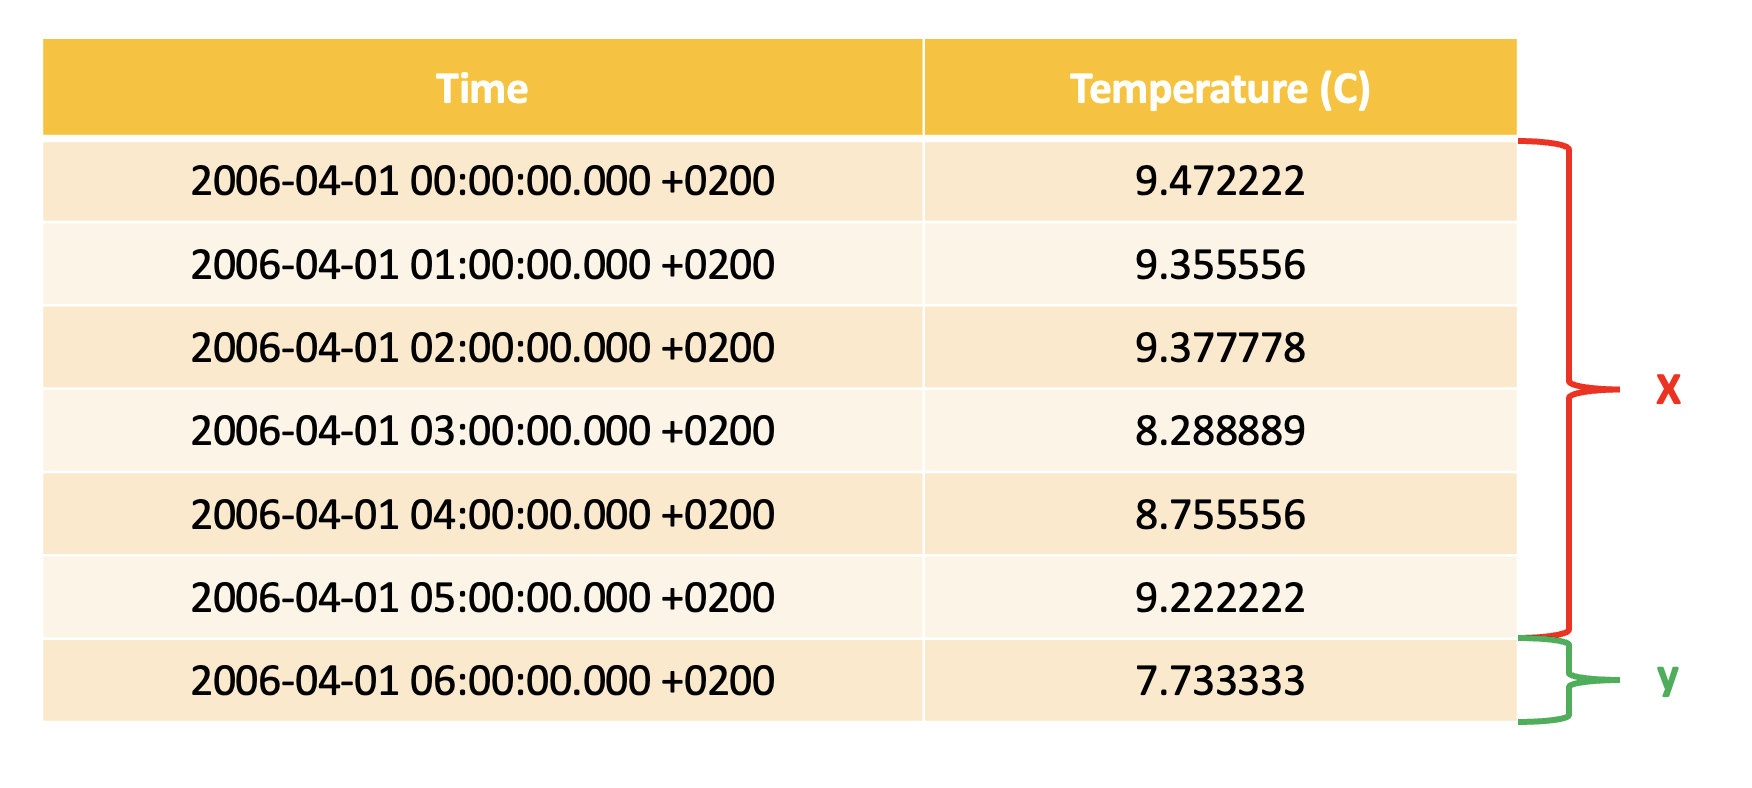

Từ đây, có thể thấy khi ta duyệt qua từng hàng trên bảng dữ liệu, ta có thể tạo ra các cặp X, y theo đúng ý của đề bài yêu cầu, nhờ đó có thể sử dụng để đưa vào huấn luyện mô hình. Kỹ thuật này được gọi là Windowing (coi các cặp X, y như các "cửa sổ"). Ta sẽ thực hiện triển khai hàm windowing này như sau:

* **Khởi tạo hàm:** Đầu tiên, ta khởi tạo hàm với tên gọi slicing_window() với các tham số đầu vào như sau:
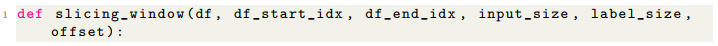

  * Trong đó:
    * **df:** DataFrame của bảng dữ liệu.
    * **df_start_idx:** Chỉ mục bắt đầu thực hiện "windowing" trong bảng dữ liệu.
    * **df_end_idx:** Chỉ mục kết thúc thực hiện "windowing" trong bảng dữ liệu.
    * **input_size:** Kích thước (số thời gian) của X.
    * **label_size:** Kích thước (số thời gian) của y.
    * **offset:** Khoảng cách về thời gian giữa X và y.

Đối với yêu cầu đề bài, có thể dễ dàng xác định được rằng input_size = 6, output_size = 1 và offset = 1.

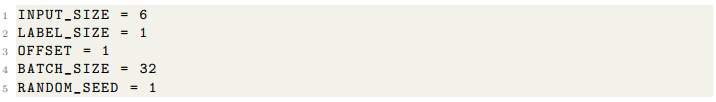

* **Khởi tạo các biến cần thiết:** Tạo hai list dùng để chứa các mẫu dữ liệu X, y. Sau đó thực hiện tính kích thước của cửa sổ = input_size + offset.

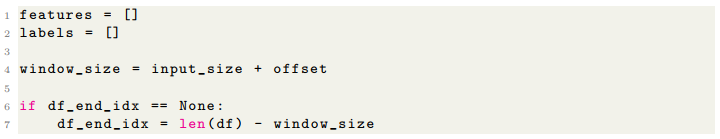



* **Thực hiện windowing:** Bắt đầu duyệt qua từng mẫu dữ liệu theo chỉ mục trong khoảng (df_start_idx, df_end_idx), ta sẽ thực hiện tìm X và y và thêm vào danh sách chứa features, labels đã khai báo phía trên.

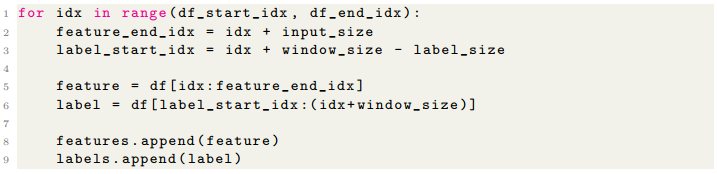

* Cuối cùng, ta chuyển đổi 2 list thành np.ndarray và sử dụng chúng làm kết quả trả về của hàm:

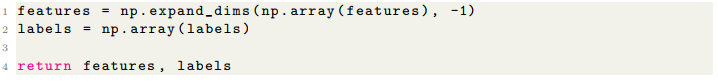

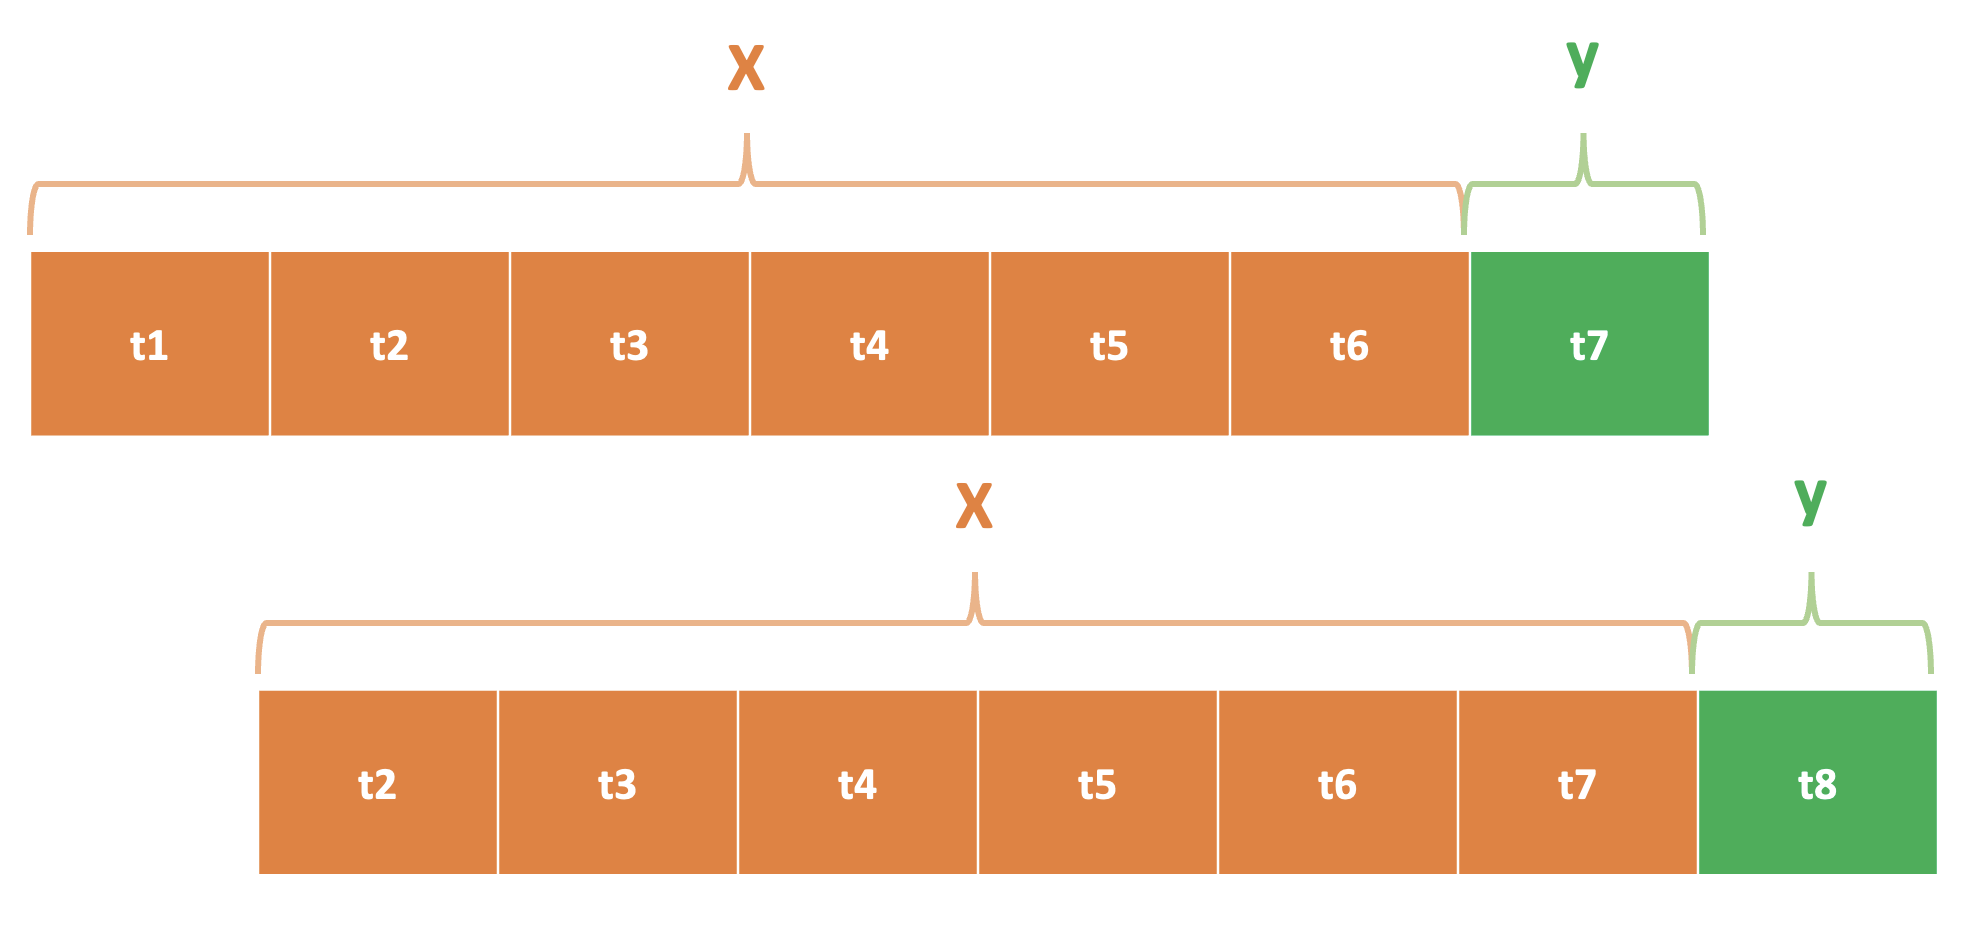

### **(c) Chia bộ dữ liệu train/val/test**

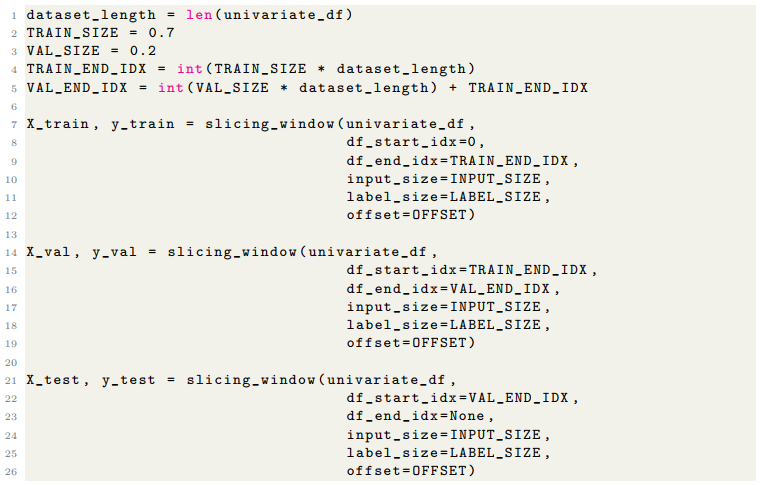

Ở đây, ta chia bộ dữ liệu theo tỉ lệ 7/2/1 (tương ứng cho train/val/test).

#### **(d) Khởi tạo tf.data.Dataset:**

Để thuận tiện trong việc huấn luyện sử dụng tensorflow, ta sẽ chuyển đổi các cặp (X, y) của train/val/test thành các tf.data.Dataset. Việc chuyển đổi này sẽ thực hiện thông qua hàm tf.data.Dataset.from_tensor_slices (các bạn đọc thêm về hàm này tại [đây](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices)).

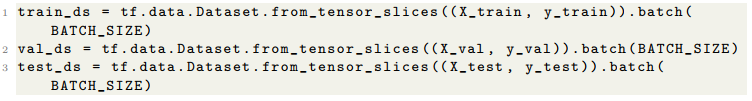

## **3. Xây dựng mô hình**


Ta sẽ xây dựng hàm khởi tạo mô hình dự đoán nhiệt độ dựa trên các lớp
mạng RNN, các bạn sẽ xây dựng theo mô tả sau đây:
* **Input layer:** Nhận vào một vector các số nguyen có shape = (6, 1).

* **Normalization layer:** Từ vector đầu vào, thực hiện chuẩn hóa dữ liệu sử dụng layer **tf.keras.layers.Normalization** (các bạn đọc thêm về layer này tại [đây](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization)) được định nghĩa bên ngoài hàm như sau:

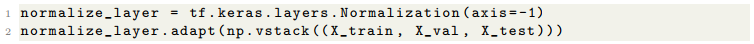

* **RNN Layer 1:** Từ vector output của normalization layer, ta đưa vào layer RNN đầu tiên với 6 units (cần trả về toàn bộ token output).

* **RNN Layer 2:** Tiếp tục đưa chuỗi output từ RNN Layer 1 vào layer RNN thứ 2 với 6 units (cần trả về toàn bộ token output).

* **RNN Layer 3:** Ta kết thúc với việc đưa chuỗi output từ RNN Layer 2 vào layer RNN thứ 3 với 6 units. Lúc này, ta chỉ cần trả về token output tại thời điểm cuối cùng.

* **Output layer:** Fully-connected với 1 node (vì output bài toán chỉ có 1 giá trị) và activation function ta để **None**.

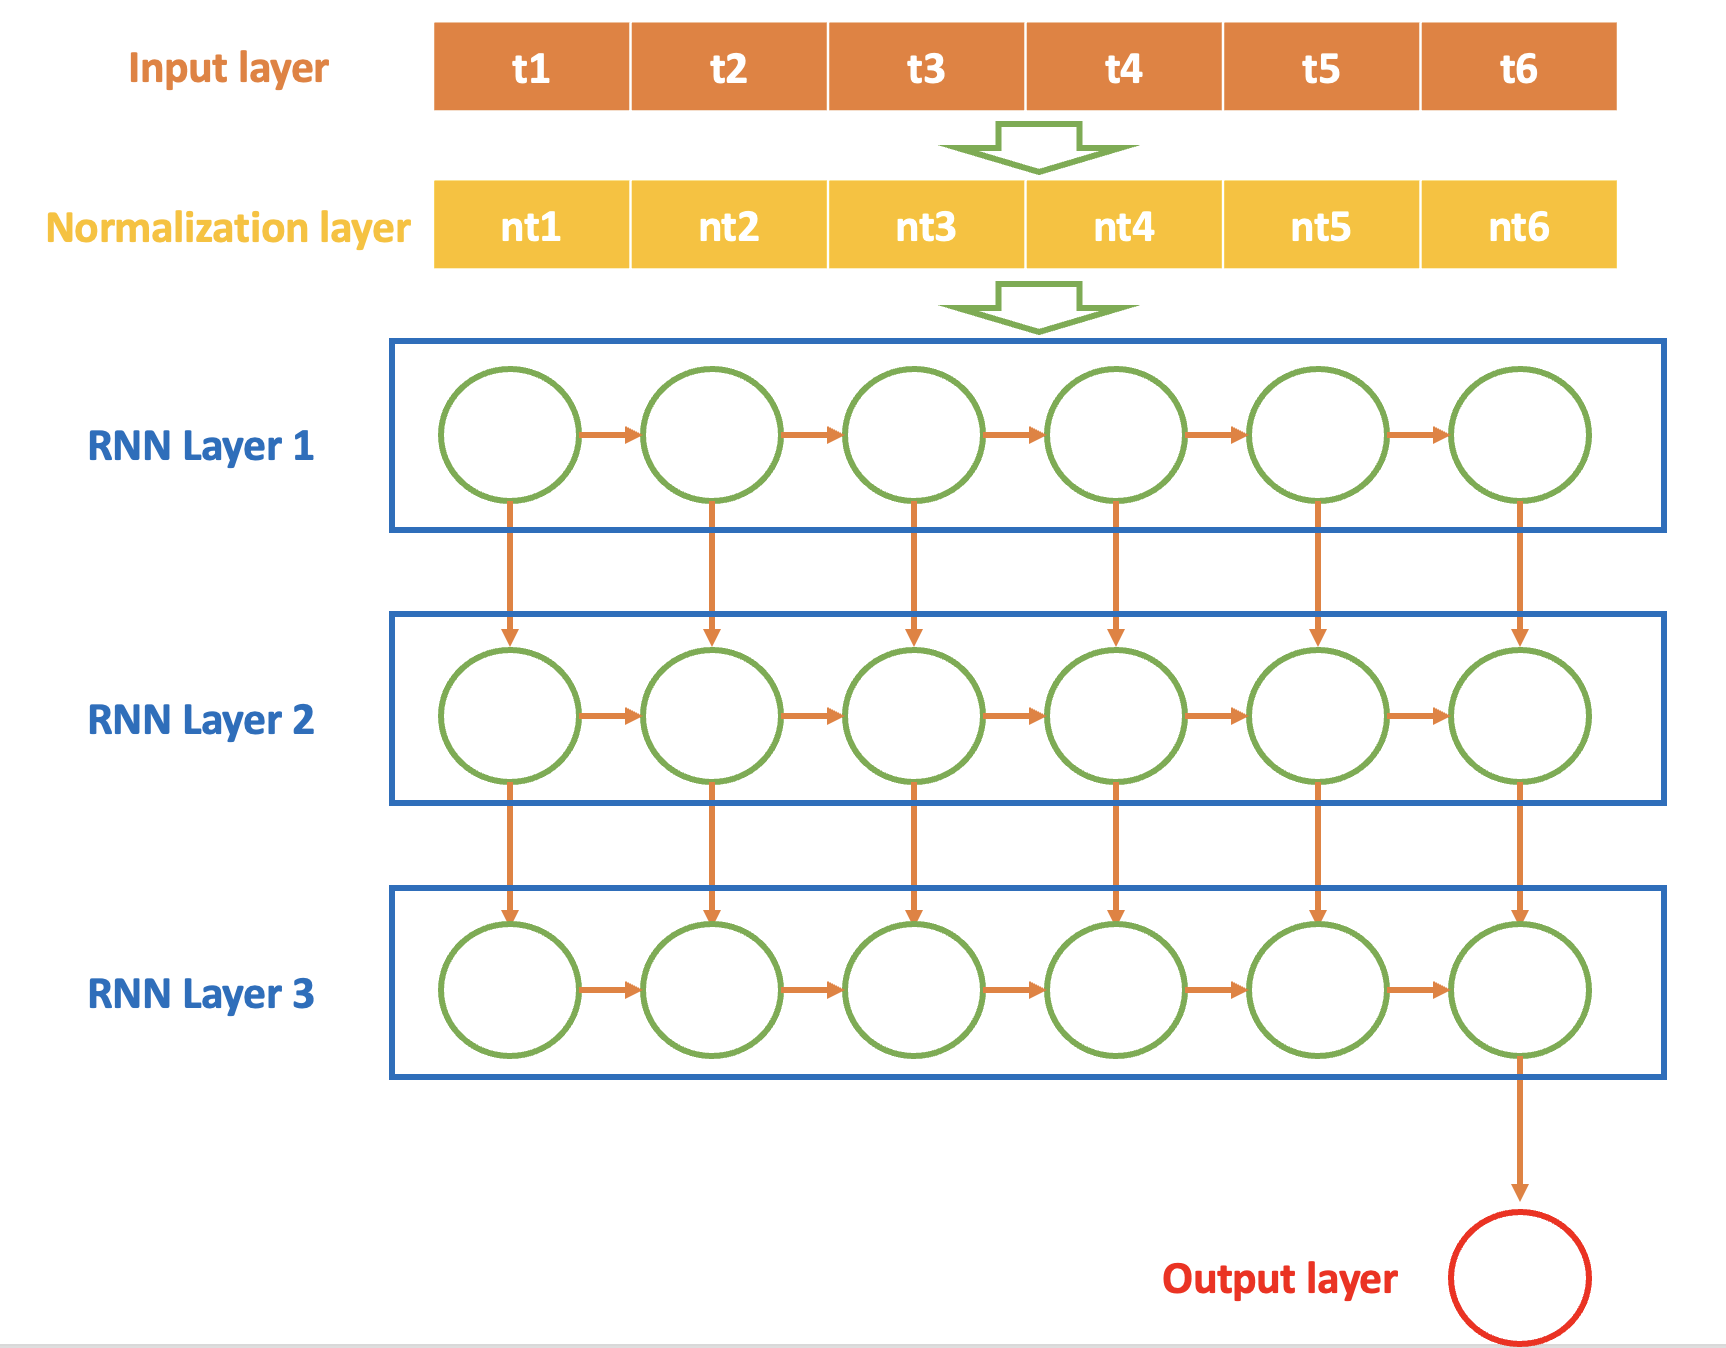

Sau khi hoàn tất, thực hiện lời gọi hàm với tên biến là **model**:

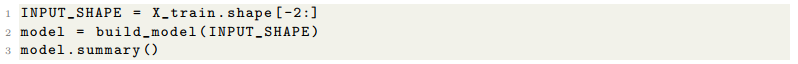

## **4. Cài đặt các tham số khác cho mô hình**

Sau khi có mô hình, ta cần cấu hình thêm một số thông tin cơ bản khác cho model bao gồm hàm loss, thuật toán tối ưu, độ đo đánh giá... Các bạn sẽ chỉnh theo danh sách như sau:

* **Loss function:** MeanSquaredError.
* **Optimizer:** Adam.

Vì đặc tính giống như bài regression nên ta sẽ không sử dụng độ đo Accuracy, vì thế không cần cài đặt thêm metrics cho mô hình.

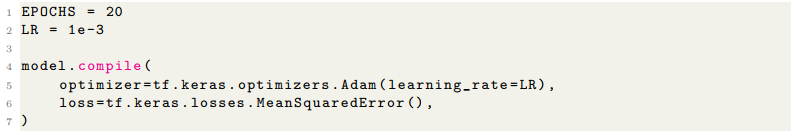

## **5. Huấn luyện mô hình**

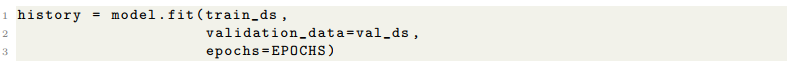

## **6. Đánh giá và trực quan hóa**

Tương tự như problem 01, ta cũng sẽ sử dụng mô hình đã huấn luyện được đem đánh giá trên tập test và trực quan kết quả loss trong quá trình huấn luyện mô
hình:
* **Đánh giá mô hình trên tập test:**
image.png

* **Trực quan hóa quá trình huấn luyện:**

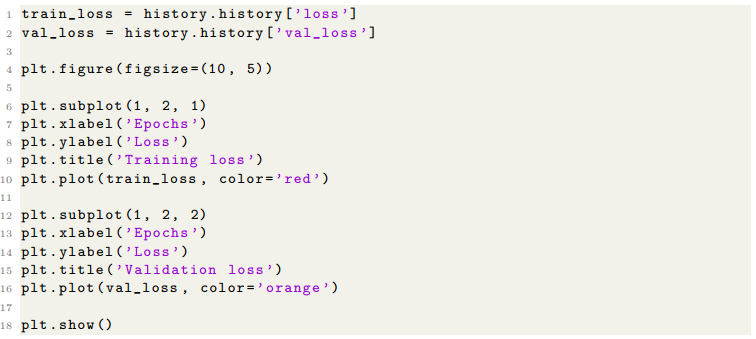

Bên cạnh đó, các bạn cũng có thể trực quan thêm giá trị dự đoán của mô hình so với giá trị thực tế để nhìn thấy sự sai lệch rõ ràng hơn sử dụng đoạn code bên dưới:

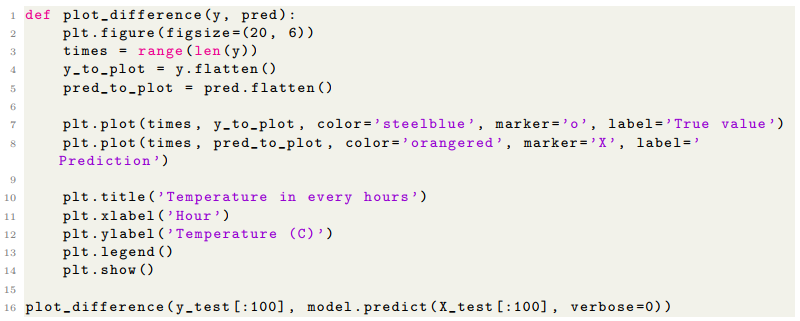

## **IMPLEMENT**

In [1]:
# https://drive.google.com/file/d/1F6kUoxIeDbc_oQO2ADtyIetzQkRdIc0r/view?usp=share_link
!gdown --id 1F6kUoxIeDbc_oQO2ADtyIetzQkRdIc0r

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F6kUoxIeDbc_oQO2ADtyIetzQkRdIc0r
To: /content/weather_forecast.zip
100% 2.34M/2.34M [00:00<00:00, 211MB/s]


In [2]:
!unzip './weather_forecast.zip'

Archive:  ./weather_forecast.zip
  inflating: weatherHistory.csv      


In [3]:
import os   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

RANDOM_SEED = 1
tf.random.set_seed(RANDOM_SEED)

In [4]:
dataset_filepath = './weatherHistory.csv' # Khai báo đường dẫn đến file .csv của bộ dữ liệu
df = pd.read_csv(dataset_filepath) # Đọc file .csv thành DataFrame
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
# Loại bỏ các cột dữ liệu không cần thiết
univariate_df = df['Temperature (C)'] # Lấy cột nhiệt độ 
univariate_df.index = df['Formatted Date'] # Chọn cột thời gian làm chỉ mục
univariate_df

Formatted Date
2006-04-01 00:00:00.000 +0200     9.472222
2006-04-01 01:00:00.000 +0200     9.355556
2006-04-01 02:00:00.000 +0200     9.377778
2006-04-01 03:00:00.000 +0200     8.288889
2006-04-01 04:00:00.000 +0200     8.755556
                                   ...    
2016-09-09 19:00:00.000 +0200    26.016667
2016-09-09 20:00:00.000 +0200    24.583333
2016-09-09 21:00:00.000 +0200    22.038889
2016-09-09 22:00:00.000 +0200    21.522222
2016-09-09 23:00:00.000 +0200    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [6]:
# Khai báo hàm Windowing (dùng để tạo các cặp X, y cho time series data)
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, offset):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = [] # Khai báo list dùng để lưu trữ các y

    window_size = input_size + offset # Tính kích thước của window

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size 
    if df_end_idx == None:
        df_end_idx = len(df) - window_size 
    
    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_end_idx = idx + input_size # Tính chỉ mục kết thúc của X
        label_start_idx = idx + window_size - label_size # Tính chỉ mục bắt đầu của y

        feature = df[idx:feature_end_idx] # Lấy X
        label = df[label_start_idx:(idx+window_size)] # Lấy y

        features.append(feature) 
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.expand_dims(np.array(features), -1) 
    labels = np.array(labels)

    return features, labels

In [7]:
univariate_df.head(7)

Formatted Date
2006-04-01 00:00:00.000 +0200    9.472222
2006-04-01 01:00:00.000 +0200    9.355556
2006-04-01 02:00:00.000 +0200    9.377778
2006-04-01 03:00:00.000 +0200    8.288889
2006-04-01 04:00:00.000 +0200    8.755556
2006-04-01 05:00:00.000 +0200    9.222222
2006-04-01 06:00:00.000 +0200    7.733333
Name: Temperature (C), dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ba0ea1c0>],
      dtype=object)

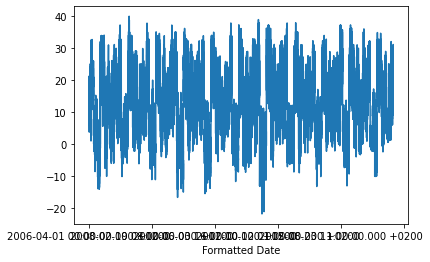

In [8]:
univariate_df.plot(subplots=True)

In [9]:
INPUT_SIZE = 6 # Dùng `input_size` giờ trước
LABEL_SIZE = 1 # Để dự đoán nhiệt độ trong `label_size` giờ
OFFSET = 1 # Vào khoảng `offset` giờ tiếp theo 
BATCH_SIZE = 32

In [10]:
dataset_length = len(univariate_df) # Số lượng mẫu dữ liệu trong DataFrame
TRAIN_SIZE = 0.7 # Tỉ lệ kích thước tập train
VAL_SIZE = 0.2 # Tỉ lệ kích thước tập val
# Đổi tỉ lệ thành chỉ mục
TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length) 
VAL_END_IDX = int(VAL_SIZE * dataset_length) + TRAIN_END_IDX

# Khởi tạo X, y cho tập train
X_train, y_train = slicing_window(univariate_df, 
                                  df_start_idx=0,
                                  df_end_idx=TRAIN_END_IDX,
                                  input_size=INPUT_SIZE,
                                  label_size=LABEL_SIZE,
                                  offset=OFFSET)

# Khởi tạo X, y cho tập val
X_val, y_val = slicing_window(univariate_df, 
                                  df_start_idx=TRAIN_END_IDX,
                                  df_end_idx=VAL_END_IDX,
                                  input_size=INPUT_SIZE,
                                  label_size=LABEL_SIZE,
                                  offset=OFFSET)

# Khởi tạo X, y cho tập test
X_test, y_test = slicing_window(univariate_df, 
                                  df_start_idx=VAL_END_IDX,
                                  df_end_idx=None,
                                  input_size=INPUT_SIZE,
                                  label_size=LABEL_SIZE,
                                  offset=OFFSET)

In [11]:
# Khởi tạo tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [12]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# Khai báo normalization layer
normalize_layer = tf.keras.layers.Normalization(axis=-1)
normalize_layer.adapt(np.vstack((X_train, X_val, X_test)))

### **1. RNN MODEL**

In [14]:
# # Xây dựng hàm khởi tạo model
# def build_model_RNN(input_shape):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(6, 1)),
        
#         normalize_layer,

#         tf.keras.layers.SimpleRNN(units= 6,
#                                   return_sequences= True,
#                                   kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                                   name='rnn_layer_1'),
                                 
#         tf.keras.layers.SimpleRNN(units= 6,
#                                   return_sequences= True,
#                                   kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                                   name='rnn_layer_2'),

#         tf.keras.layers.SimpleRNN(units= 6,
#                                   return_sequences= False,
#                                   kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                                   name='rnn_layer_3'),  

#         tf.keras.layers.Dense(1,
#                               activation=None)                                                   
#     ], name='rnn_model')

#     return model

# INPUT_SHAPE = X_train.shape[-2:] 
# model = build_model_RNN(INPUT_SHAPE)
# model.summary()    

### **2. LSTM MODEL**

In [15]:
# Xây dựng hàm khởi tạo model
def build_model_LSTM(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(6, 1)),
        
        normalize_layer,

        tf.keras.layers.LSTM(units= 6,
                                  return_sequences= True,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                                  name='lstm_layer_1'),
                                 
        tf.keras.layers.LSTM(units= 6,
                                  return_sequences= True,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                                  name='lstm_layer_2'),

        tf.keras.layers.LSTM(units= 6,
                                  return_sequences= False,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                                  name='lstm_layer_3'),  

        tf.keras.layers.Dense(1,
                              activation=None)                                                   
    ], name='lstm_model')

    return model

# INPUT_SHAPE = X_train.shape[-2:] 
# model = build_model_LSTM(INPUT_SHAPE)
# model.summary()    

### **3. Bi-LSTM MODEL**

In [16]:
# # Xây dựng hàm khởi tạo model
def build_model_BiLSTM(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(6, 1)),
        
        normalize_layer,

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6,
                                  return_sequences= True,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                  name='bidirectional_layer_1'),
                                 
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6,
                                  return_sequences= True,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                  name='bidirectional_layer_2'),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6,
                                  return_sequences= False,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED)),
                                  name='bidirectional_layer_3'),  

        tf.keras.layers.Dense(1,
                              activation=None)                                                   
    ], name='bidirectionalLSTM_model')

    return model

INPUT_SHAPE = X_train.shape[-2:] 
model = build_model_BiLSTM(INPUT_SHAPE)
model.summary()    

Model: "bidirectionalLSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6, 1)             3         
 n)                                                              
                                                                 
 bidirectional_layer_1 (Bidi  (None, 6, 12)            384       
 rectional)                                                      
                                                                 
 bidirectional_layer_2 (Bidi  (None, 6, 12)            912       
 rectional)                                                      
                                                                 
 bidirectional_layer_3 (Bidi  (None, 12)               912       
 rectional)                                                      
                                                                 
 dense (Dense)               (None, 1)     

In [17]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 20
LR = 1e-3

In [18]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.MeanSquaredError(), # Sử dụng hàm loss Mean Squared Error
)

In [19]:
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=EPOCHS)

Epoch 1/20
2110/2110 [==============================] - 40s 13ms/step - loss: 55.2697 - val_loss: 11.2206
Epoch 2/20
2110/2110 [==============================] - 26s 12ms/step - loss: 8.6452 - val_loss: 4.9525
Epoch 3/20
2110/2110 [==============================] - 26s 12ms/step - loss: 3.7925 - val_loss: 2.6700
Epoch 4/20
2110/2110 [==============================] - 26s 12ms/step - loss: 2.7554 - val_loss: 2.1832
Epoch 5/20
2110/2110 [==============================] - 26s 12ms/step - loss: 2.4958 - val_loss: 1.9371
Epoch 6/20
2110/2110 [==============================] - 26s 12ms/step - loss: 2.4090 - val_loss: 1.7996
Epoch 7/20
2110/2110 [==============================] - 26s 12ms/step - loss: 2.3561 - val_loss: 1.7432
Epoch 8/20
2110/2110 [==============================] - 25s 12ms/step - loss: 2.3205 - val_loss: 1.6951
Epoch 9/20
2110/2110 [==============================] - 26s 12ms/step - loss: 2.3016 - val_loss: 1.6470
Epoch 10/20
2110/2110 [==============================] - 27s 1

In [20]:
# Đánh giá mô hình trên tập test
test_evaluation = model.evaluate(test_ds)

302/302 [==============================] - 2s 5ms/step - loss: 1.2739


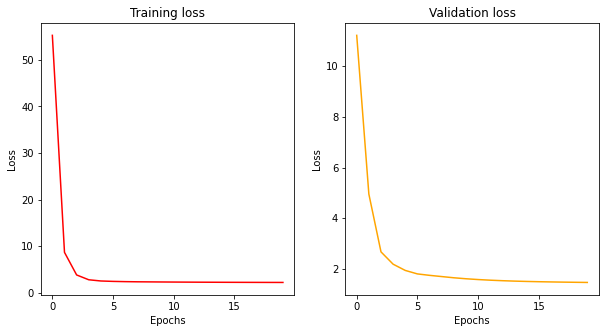

In [21]:
train_loss = history.history['loss']# Đọc thông tin loss trên tập train
val_loss = history.history['val_loss'] # Đọc thông tin loss trên tập val

plt.figure(figsize=(10, 5)) # Cài đặt kích thước khung ảnh

plt.subplot(1, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='red') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(1, 2, 2) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='orange') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.show() # Hiển thị 2 khung ảnh nhỏ

In [22]:
def create_time_steps(length):

  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)

  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])

  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')

  return plt

1/1 [==============================] - 2s 2s/step


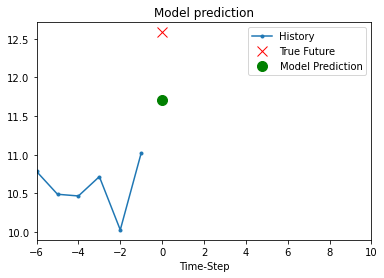

1/1 [==============================] - 0s 16ms/step


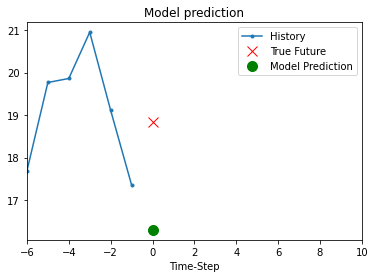

1/1 [==============================] - 0s 20ms/step


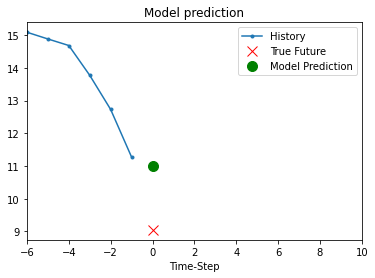

1/1 [==============================] - 0s 19ms/step


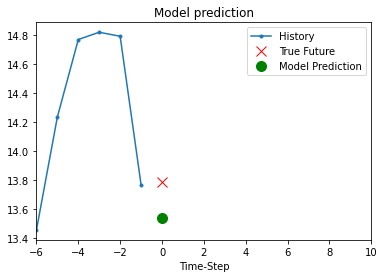

1/1 [==============================] - 0s 18ms/step


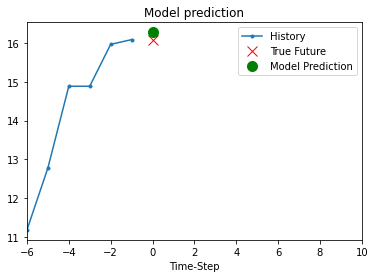

1/1 [==============================] - 0s 16ms/step


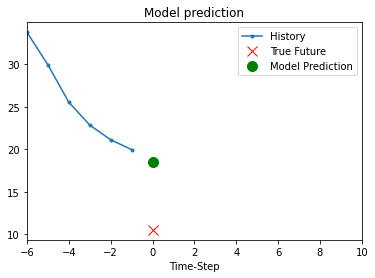

1/1 [==============================] - 0s 21ms/step


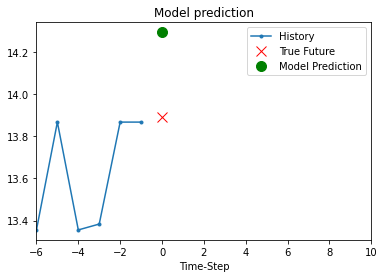

1/1 [==============================] - 0s 21ms/step


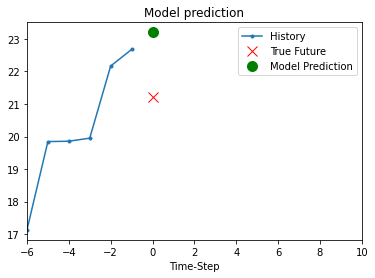

1/1 [==============================] - 0s 17ms/step


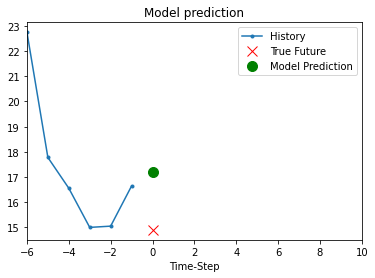

1/1 [==============================] - 0s 19ms/step


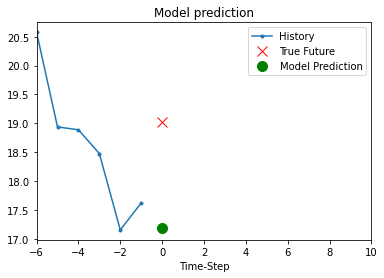

In [23]:
for X, y in test_ds.take(10):
  plot = show_plot([X[0].numpy(), y[0].numpy(),
                    model.predict(X)[0]], 0, 'Model prediction')
  plot.show()

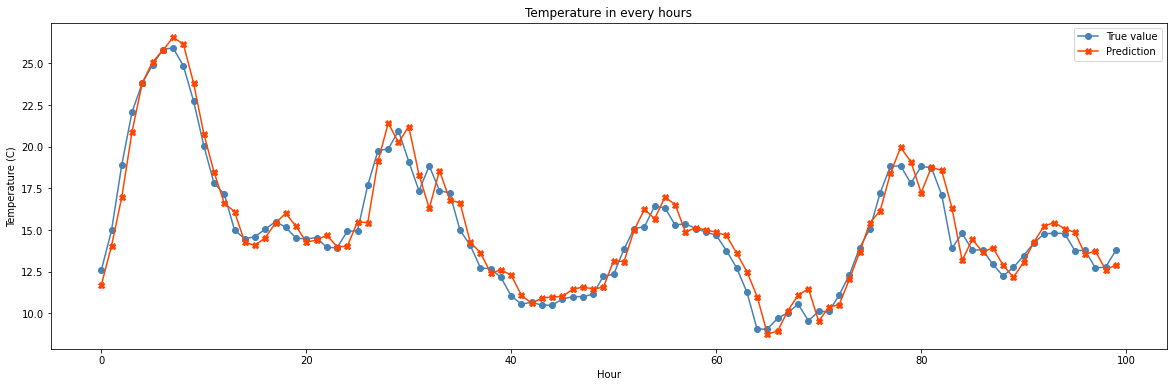

In [24]:
def plot_difference(y, pred):
    plt.figure(figsize=(20, 6))
    times = range(len(y))
    y_to_plot = y.flatten()
    pred_to_plot = pred.flatten()

    plt.plot(times, y_to_plot, color='steelblue', marker='o', label='True value')
    plt.plot(times, pred_to_plot, color='orangered', marker='X', label='Prediction')

    plt.title('Temperature in every hours')
    plt.xlabel('Hour')
    plt.ylabel('Temperature (C)')
    plt.legend()
    plt.show()

plot_difference(y_test[:100], model.predict(X_test[:100], verbose=0))